In [1]:
import time
import yaml

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

## Load Dataset

In [2]:
df_train = pd.read_parquet("../dataset/combined/undersampled/train-sel-10.parquet")
df_test = pd.read_parquet("../dataset/combined/full/test-sel-10.parquet")

In [3]:
X_train, y_train = df_train.drop(columns=["zone_id", "target"]), df_train["target"]
X_test, y_test = df_test.drop(columns=["zone_id", "target"]), df_test["target"]

In [4]:
scaler = MinMaxScaler()
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

## Training

In [5]:
best_params = yaml.safe_load(open("../dataset/models/best_params_random_forest.yml", "r"))
clf = RandomForestClassifier(**best_params)

st = time.time()
clf.fit(X_train_t, y_train)
dt = time.time() - st

print("Time:", np.round(dt, 4))

Time: 41.8434


## Evaluation

In [6]:
st = time.time()
y_pred = clf.predict(X_test_t)
dt = time.time() - st

print("Time:", np.round(dt, 4))
print("MCC:", np.round(matthews_corrcoef(y_test, y_pred), 4))
print("Accuracy:", np.round(accuracy_score(y_test, y_pred), 4))
print("Precision:", np.round(precision_score(y_test, y_pred), 4))
print("Recall:", np.round(recall_score(y_test, y_pred), 4))
print("F1:", np.round(f1_score(y_test, y_pred), 4))

print(classification_report(y_test, y_pred))

Time: 5.5924
MCC: 0.8413
Accuracy: 0.9951
Precision: 0.7116
Recall: 0.9996
F1: 0.8314
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    624455
           1       0.71      1.00      0.83      7634

    accuracy                           1.00    632089
   macro avg       0.86      1.00      0.91    632089
weighted avg       1.00      1.00      1.00    632089



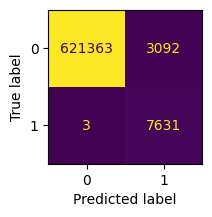

In [7]:
fig, ax = plt.subplots(figsize=(2, 2))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, colorbar=False)

## Feature Importance

In [12]:
import shap
shap.initjs()

In [13]:
y_test.shape

(632089,)

In [18]:
idx = np.random.choice(np.arange(X_test.shape[0]), 1000, replace=False)
X_samples = X_test.iloc[idx, :]
y_samples = y_test.iloc[idx]

shap_df = pd.DataFrame(X_samples, columns=X_test.columns.tolist())
shap_df.head()

,sob_mean,sob_sum,fe_mean,fe_sum,so_sum,po4_mean,pbo_mean,pbo_sum,tob_mean,tob_sum
1660891,34.755722,417.068665,0.000194,0.000194,427.524078,0.176731,1884.797363,22617.568359,2.420693,29.048313
2830847,34.735554,312.619995,0.000333,0.000333,320.865875,0.173100,2730.312256,24572.810547,1.617648,14.558830
1308478,34.807137,417.685638,0.000354,0.000708,423.604767,0.163522,3097.030518,37164.367188,2.071815,24.861778
1383224,34.747353,555.957642,0.000747,0.001494,563.289429,0.128248,2345.784180,37532.546875,2.231806,35.708900
2111608,34.518349,552.293579,0.000332,0.000332,568.920227,0.144099,1309.604248,20953.667969,3.353740,53.659836


In [20]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer(shap_df)

### Global Importance

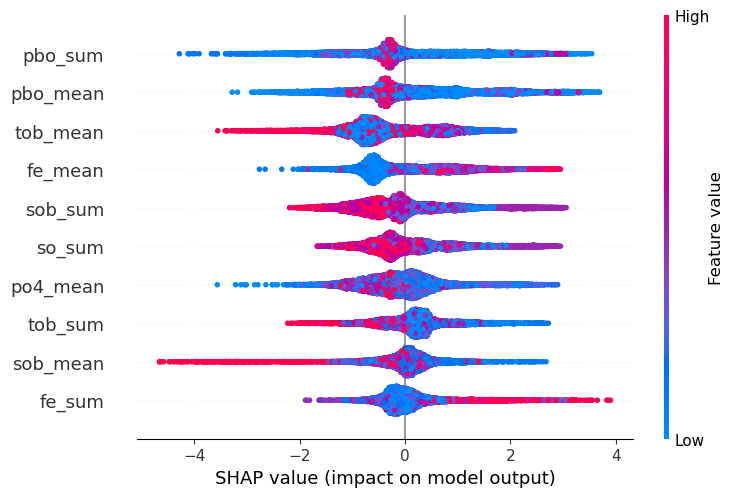

In [ ]:
shap.plots.beeswarm(shap_values)

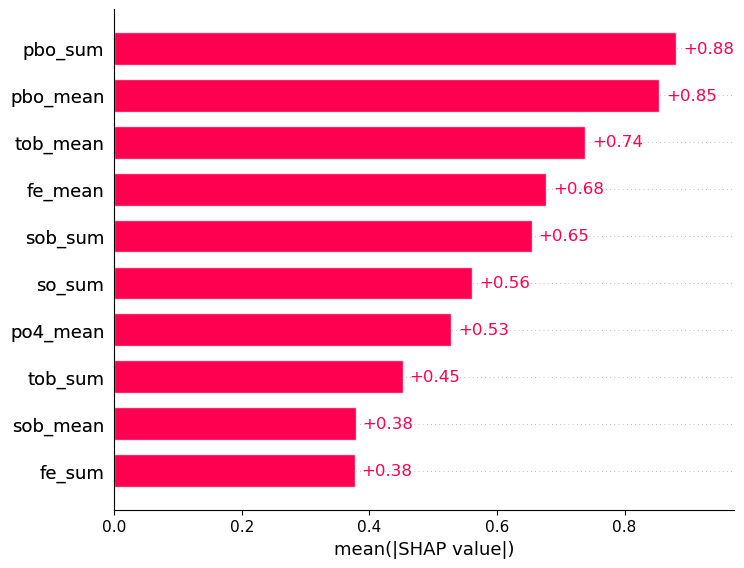

In [ ]:
shap.plots.bar(shap_values)

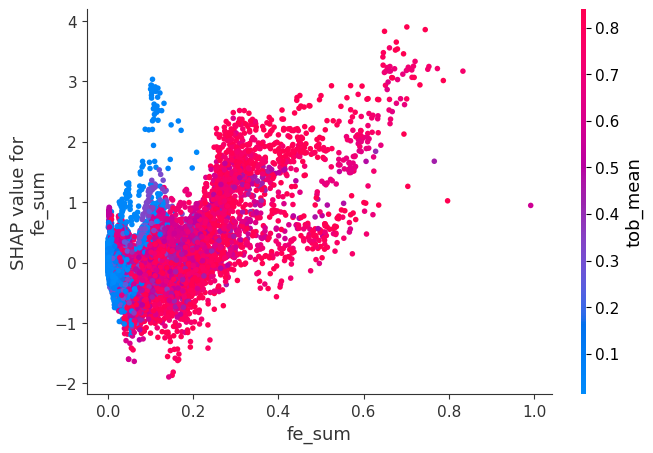

In [ ]:
shap.dependence_plot("fe_sum", shap_values.values, shap_df)

### Sample Importance

In [ ]:
# Sample 0 - tidak muncul
shap.plots.force(shap_values[0, ...])

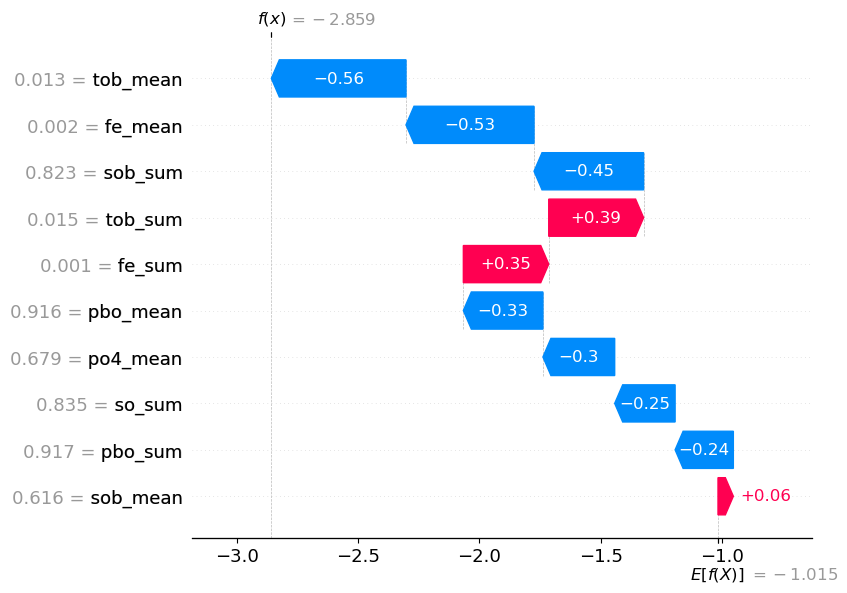

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
# Sample 1 - tidak muncul
shap.plots.force(shap_values[1, ...])

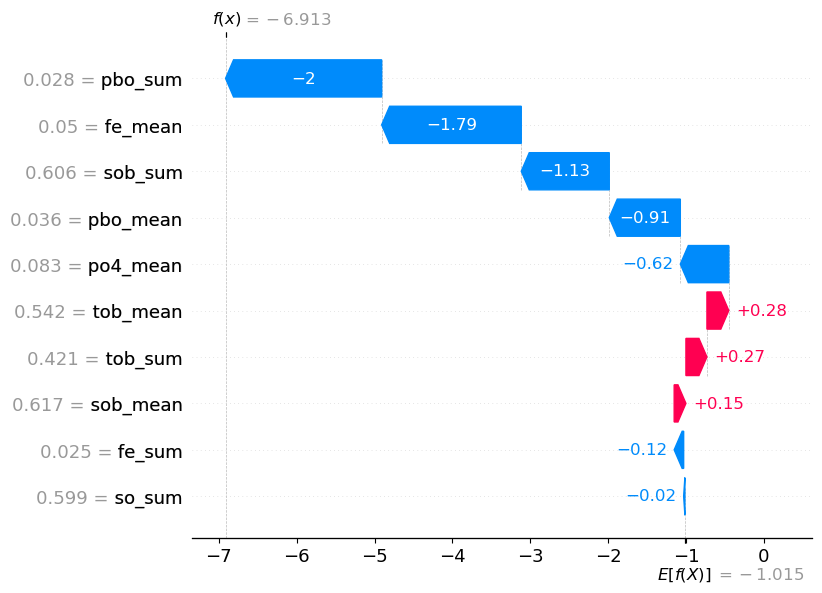

In [ ]:
shap.plots.waterfall(shap_values[1])

In [ ]:
# Sample 3 - muncul
shap.plots.force(shap_values[3, ...])

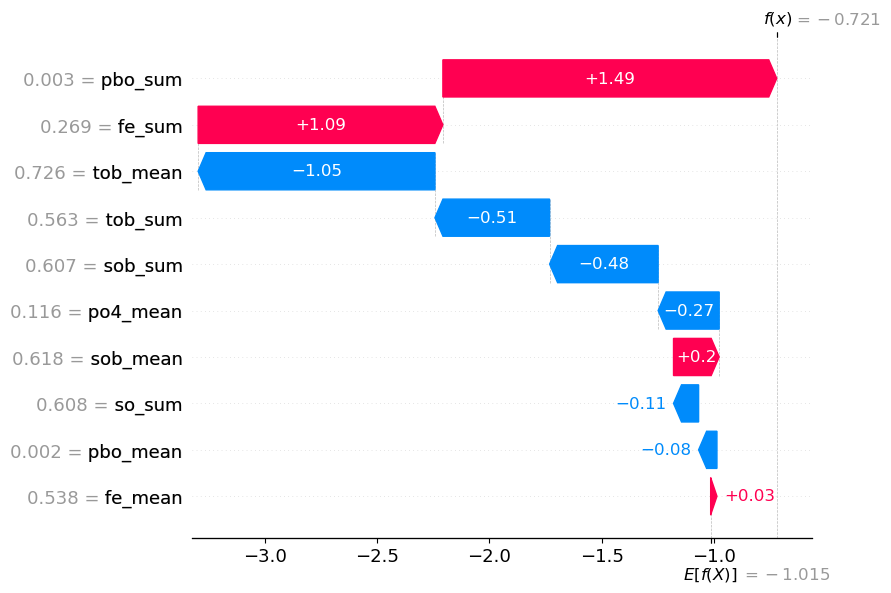

In [ ]:
shap.plots.waterfall(shap_values[3])

In [ ]:
# Sample 5 - muncul
shap.plots.force(shap_values[5, ...])

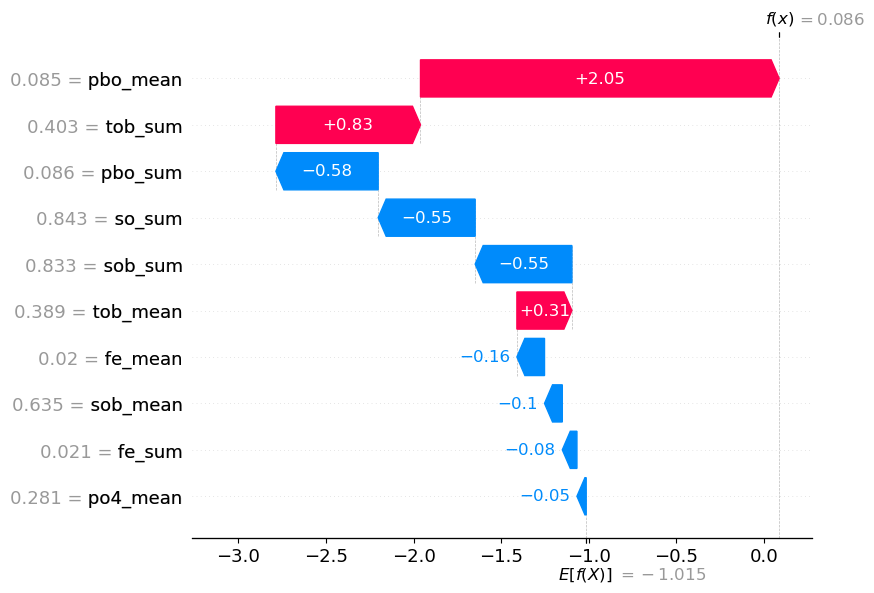

In [ ]:
shap.plots.waterfall(shap_values[5])